## Observations and Insights

## Dependencies and starter code

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
# mouse_metadata.head()
# study_results.head()

# Combine the data into a single dataset
mouseMergedf = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
mouseMergedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [21]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
avgTumorVol = mouseMergedf.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"].rename("Avg Tumor Vol")
medTumorVol = mouseMergedf.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"].rename("Median Tumor Vol")
varTumorVol = mouseMergedf.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"].rename("Variance")
stdevTumorVol = mouseMergedf.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"].rename("Std Dev")
semTumorVol = mouseMergedf.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"].rename("SEM")

tumorVoldf = pd.DataFrame({"Avg Tumor Vol": avgTumorVol, "Median Tumor Vol": medTumorVol, 
                         "Variance": varTumorVol, "Std Dev": stdevTumorVol, 
                           "SEM": semTumorVol})

sortedTumorsdf = tumorVoldf.sort_values("Avg Tumor Vol", ascending = True)

sortedTumorsdf["Avg Tumor Vol"] = tumorVoldf["Avg Tumor Vol"].map("{:,.5f}".format)
sortedTumorsdf["Median Tumor Vol"] = tumorVoldf["Median Tumor Vol"].map("{:,.5f}".format)
sortedTumorsdf["Variance"] = tumorVoldf["Variance"].map("{:,.5f}".format)
sortedTumorsdf["Std Dev"] = tumorVoldf["Std Dev"].map("{:,.5f}".format)
sortedTumorsdf["SEM"] = tumorVoldf["SEM"].map("{:,.5f}".format)
sortedTumorsdf

,Avg Tumor Vol,Median Tumor Vol,Variance,Std Dev,SEM
Drug Regimen,,,,,
Ramicane,40.21675,40.67324,23.48670,4.84631,0.32095
Capomulin,40.67574,41.55781,24.94776,4.99477,0.32935
Propriva,52.32255,50.85463,42.35107,6.50777,0.51288
Ceftamin,52.59117,51.77616,39.29018,6.26819,0.46982
Infubinol,52.88480,51.82058,43.12868,6.56724,0.49224
Zoniferol,53.23651,51.81848,48.53336,6.96659,0.51640
Placebo,54.03358,52.28893,61.16808,7.82100,0.58133
Stelasyn,54.23315,52.43174,59.45056,7.71042,0.57311
Naftisol,54.33156,52.50928,66.17348,8.13471,0.59647


## Bar plots

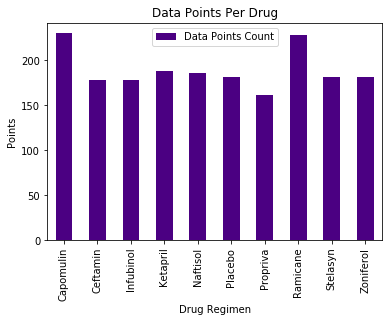

In [22]:
# Bar plot showing number of data points for each treatment regimen using pandas
plt.close()
dataCols = mouseMergedf[["Drug Regimen", "Tumor Volume (mm3)"]].copy()
dataPntsdf = dataCols.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" : "count"}).copy()
dataPntsdf = dataPntsdf.rename(columns={"Tumor Volume (mm3)": "Data Points Count"})                       

dataPntsdf.plot(kind="bar", title="Data Points Per Drug", color="indigo")
plt.ylabel("Points")
plt.show()

Text(0.5, 1.0, 'Data Points per Drug')

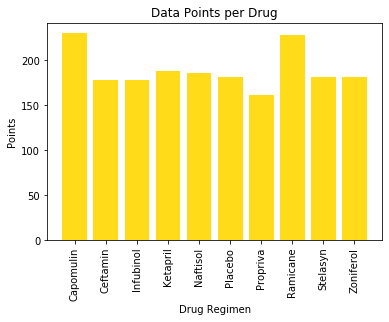

In [23]:
# Bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(mouseMergedf["Drug Regimen"].unique()))
tick_locations = [value for value in x_axis]


plt.bar(x_axis, dataPntsdf["Data Points Count"], color='gold', alpha=0.9, align="center")
plt.xticks(tick_locations, dataPntsdf.index.values, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Points")
plt.title("Data Points per Drug")



## Pie plots

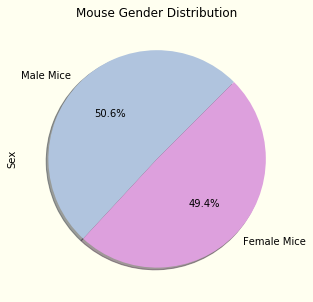

In [24]:
# Pie plot showing the distribution of female versus male mice using pandas
fig, ax = plt.subplots(figsize = (8,5))
colors = ["lightsteelblue", "plum"]
labels = ["Male Mice", "Female Mice"]
mousePiedf = mouseMergedf["Sex"].value_counts({"Sex": "count"})                   
mousePiedf.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors = colors, labels = labels, startangle=45)
fig.set_facecolor("ivory")
plt.title("Mouse Gender Distribution")
plt.show()

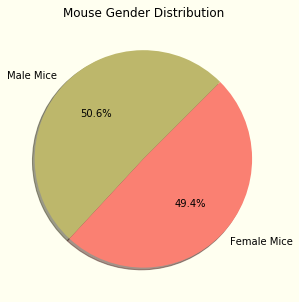

In [25]:
# Pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots(figsize = (8,5))
colors = ["darkkhaki", "salmon"]
labels = ["Male Mice", "Female Mice"]
mousePiesdf = mouseMergedf["Sex"].value_counts({"Sex": "count"})
plt.pie(mousePiesdf, autopct="%1.1f%%", shadow=True, colors = colors, labels = labels, startangle=45)
fig.set_facecolor("ivory")
plt.title("Mouse Gender Distribution")
plt.show()

## Quartiles, outliers and boxplots

In [26]:
# The final tumor volume of each mouse across four of the most promising treatment regimens.  
capomulinTrialsdf = mouseMergedf.loc[mouseMergedf["Drug Regimen"] == "Capomulin",:]
ramicaneTrialsdf = mouseMergedf.loc[mouseMergedf["Drug Regimen"] == "Ramicane",:]
infubinolTrialsdf = mouseMergedf.loc[mouseMergedf["Drug Regimen"] == "Infubinol",:]
ceftaminTrialsdf = mouseMergedf.loc[mouseMergedf["Drug Regimen"] == "Ceftamin",:]
capomulinTrialsdf.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [27]:
timepoint45_df = mouseMergedf.loc[mouseMergedf['Timepoint'] == 45]
timepoint45_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [28]:
capo = timepoint45_df.loc[timepoint45_df['Drug Regimen'] == 'Capomulin']
capomulinTrialsTumorVol = capo["Tumor Volume (mm3)"]
rami = timepoint45_df.loc[timepoint45_df['Drug Regimen'] == 'Ramicane']
ramicaneTrialsTumorVol = rami["Tumor Volume (mm3)"]
infu = timepoint45_df.loc[timepoint45_df['Drug Regimen'] == 'Infubinol']
infubinolTrialsTumorVol = infu["Tumor Volume (mm3)"]
ceft = timepoint45_df.loc[timepoint45_df['Drug Regimen'] == 'Ceftamin']
ceftaminTrialsTumorVol = ceft["Tumor Volume (mm3)"]

In [29]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
print("Quartiles for Capomulin")
quartiles = capomulinTrialsTumorVol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Vol is: {lowerq}")
print(f"The upper quartile of Tumor Vol is: {upperq}")
print(f"The interquartile range of Tumor Vol is: {iqr}")
print(f"The the median of Tumor Vol is: {quartiles.loc[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n")

# ..................................................

print("Quartiles for Ramicane")
quartiles = ramicaneTrialsTumorVol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Tumor Vol is: {lowerq}")
print(f"The upper quartile of Tumor Vol is: {upperq}")
print(f"The interquartile range of Tumor Vol is: {iqr}")
print(f"The the median of Tumor Vol is: {quartiles.loc[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n")

# ....................................................

print("Quartiles for Infubinol")
quartiles = infubinolTrialsTumorVol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Vol is: {lowerq}")
print(f"The upper quartile of Tumor Vol is: {upperq}")
print(f"The interquartile range of Tumor Vol is: {iqr}")
print(f"The the median of Tumor Vol is: {quartiles.loc[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n")

# ....................................................

print("Quartiles for Ceftamine")
quartiles = ceftaminTrialsTumorVol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Vol is: {lowerq}")
print(f"The upper quartile of Tumor Vol is: {upperq}")
print(f"The interquartile range of Tumor Vol is: {iqr}")
print(f"The the median of Tumor Vol is: {quartiles.loc[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Quartiles for Capomulin
The lower quartile of Tumor Vol is: 32.37735684
The upper quartile of Tumor Vol is: 40.1592203
The interquartile range of Tumor Vol is: 7.781863460000004
The the median of Tumor Vol is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Quartiles for Ramicane
The lower quartile of Tumor Vol is: 30.981175224999998
The upper quartile of Tumor Vol is: 38.508305307499995
The interquartile range of Tumor Vol is: 7.527130082499998
The the median of Tumor Vol is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.

Quartiles for Infubinol
The lower quartile of Tumor Vol is: 62.75445141
The upper quartile of Tumor Vol is: 67.68556862
The interquartile range of Tumor Vol is: 4.9311172099999965
The the median of Tumor Vol is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.

Quartiles 

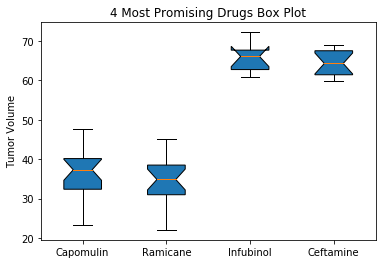

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# drugData = [capomulinTrialsdf,ramicaneTrialsdf,infubinolTrialsdf,ceftaminTrialsdf]
drugData = [capomulinTrialsTumorVol, ramicaneTrialsTumorVol, infubinolTrialsTumorVol, ceftaminTrialsTumorVol]

plt.boxplot(drugData, notch='True', patch_artist=True)
# colors = ["cyan", "lightblue", "lightgreen", "tan"]
plt.xticks([1,2,3,4],["Capomulin", "Ramicane","Infubinol","Ceftamine"])
plt.ylabel("Tumor Volume")
plt.title("4 Most Promising Drugs Box Plot")

plt.show()    

## Line and scatter plots

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capmouse = mouseMergedf.loc[mouseMergedf['Drug Regimen'] == "Capomulin"]
capmousedf = capmouse.head(10)
capmousedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


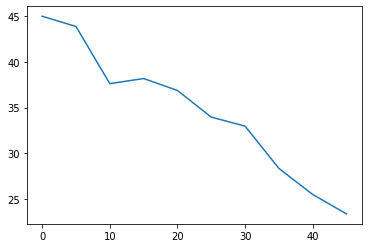

In [32]:
plt.plot([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], capmousedf['Tumor Volume (mm3)'])

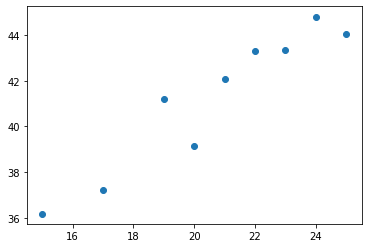

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capmousedf = capmouse.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean()
capgrp = pd.DataFrame(capmousedf)
capgrp.reset_index()
capgrp.head(16)
x_values = [15, 17, 19, 20 ,21 ,22, 23, 24, 25]
plt.scatter(x_values, capgrp['Tumor Volume (mm3)'])

NameError: name 'linregress' is not defined

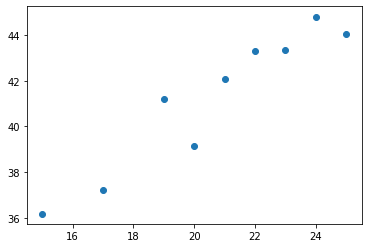

In [34]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
capmousedf = capmouse.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean()
capgrp = pd.DataFrame(capmousedf)
capgrp.reset_index()
capgrp.head(16)
xvaldict = {
    "Key" : [0, 1, 2, 3, 4, 5, 6, 7, 8],
    "x_values" : [15, 17, 19, 20 ,21 ,22, 23, 24, 25]
}
x_valdf = pd.DataFrame(xvaldict)
x_values = x_valdf['x_values']
y_values = capgrp['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(17, 36), fontsize=15, color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()